<a href="https://colab.research.google.com/github/cheysreylin/Machinelearning/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import numpy as np 
import pandas as pd 

In [149]:
from google.colab import files 
file = files.upload()

Saving credit_card_dataset.csv to credit_card_dataset (3).csv


In [150]:
dataset = pd.read_csv("credit_card_dataset.csv")
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [151]:
dataset['Class'].value_counts()

0.0    1096
1.0       2
Name: Class, dtype: int64

In [136]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,...,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,409.421676,-0.184320,0.222575,0.871402,0.249173,-0.035795,0.140823,0.088649,-0.074704,0.006478,...,0.000336,-0.121112,-0.040705,0.007217,0.113409,0.027041,0.012656,-0.016216,66.624636,0.001821
std,245.304019,1.333357,1.163782,1.023511,1.263498,1.088469,1.232755,0.837047,0.894139,0.911589,...,0.634574,0.612216,0.369022,0.612823,0.427967,0.470137,0.339867,0.266576,186.832976,0.042660
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.980624,...,-4.134608,-2.776923,-4.020300,-1.867208,-1.544209,-1.243924,-3.525281,-2.735623,0.000000,0.000000
25%,194.000000,-0.937798,-0.196234,0.294484,-0.453176,-0.567874,-0.641635,-0.336109,-0.179686,-0.491459,...,-0.223637,-0.543190,-0.177074,-0.352972,-0.160561,-0.304275,-0.047442,-0.018823,5.367500,0.000000
50%,410.000000,-0.363563,0.280917,0.867803,0.360718,-0.156141,-0.122938,0.085201,0.029211,-0.058972,...,-0.080269,-0.098671,-0.048794,0.096111,0.146677,-0.000715,0.020955,0.020767,15.845000,0.000000
75%,629.750000,1.126664,0.866319,1.527809,1.070602,0.428206,0.481404,0.556425,0.249017,0.447909,...,0.084635,0.294244,0.075503,0.425961,0.419887,0.265055,0.111854,0.084615,55.000000,0.000000
max,846.000000,1.685314,5.267376,4.017561,4.861129,7.672544,5.122103,4.808426,3.877662,5.459274,...,5.273420,1.957759,3.150413,1.215279,1.206820,3.087444,2.490503,1.575380,3828.040000,1.000000


In [ ]:
# SHUFFLING THE ROWS OF THE DF

# dataset = dataset.sample(frac = 0, random_state = 1)
# dataset = dataset.reset_index(drop = True)
# dataset.head()

In [152]:
dataset.isnull().sum() / len(dataset)

Time      0.996142
V1        0.996142
V2        0.996142
V3        0.996142
V4        0.996142
V5        0.996142
V6        0.996142
V7        0.996142
V8        0.996142
V9        0.996142
V10       0.996142
V11       0.996142
V12       0.996142
V13       0.996142
V14       0.996142
V15       0.996142
V16       0.996142
V17       0.996142
V18       0.996142
V19       0.996142
V20       0.996142
V21       0.996142
V22       0.996142
V23       0.996142
V24       0.996142
V25       0.996142
V26       0.996142
V27       0.996142
V28       0.996142
Amount    0.996142
Class     0.996142
dtype: float64

In [153]:
dataset = dataset.dropna()

In [154]:
dataset.isnull().sum() / len(dataset)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [158]:
as_np = dataset.to_numpy()
index = int(len(as_np)* .92)
x_train,y_train = as_np[:index,:-1],as_np[:index,-1]
x_test,y_test = as_np[index:, :-1], as_np[index:, -1]
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)

(((1010, 30), (1010,)), ((88, 30), (88,)))

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)
print(x_test)

[[-1.66547693 -0.89252495 -0.25552777 ...  0.37672349 -0.01174681
   0.44004173]
 [-1.66547693  1.03983738  0.03837778 ... -0.0707093   0.12259668
  -0.34212918]
 [-1.66103927 -0.89142454 -1.35454086 ... -0.21626217 -0.15706078
   1.6593191 ]
 ...
 [ 1.70270937  0.99307603 -0.36967725 ...  0.2357677   0.14470585
  -0.27659781]
 [ 1.70714703  0.93026968  0.05709687 ... -0.12693232  0.15654314
   0.08214783]
 [ 1.71158469 -0.27253207 -2.10498047 ... -0.27373146  0.65082495
   3.86076847]]
[[ 1.71602235 -0.05456407  0.31502229 ...  0.25419504  0.52120373
  -0.19679966]
 [ 1.72046002  1.25917872 -0.42415705 ... -0.12562865  0.06031936
  -0.27659781]
 [ 1.72046002  0.94912443 -0.37228214 ...  0.09264343  0.15113278
  -0.1970126 ]
 ...
 [ 2.07991073  1.10246737 -0.15013976 ...  0.17982881  0.15115775
  -0.35112577]
 [ 2.08434839  0.87635671 -0.99340619 ... -0.03255864  0.23809748
   0.71409167]
 [ 2.08878606  1.07695419  0.06127547 ...  0.11506777  0.16169778
  -0.34851729]]


In [160]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train,y_train)
test_predictions = model.predict(x_test)
pd.value_counts(test_predictions)

0.0    88
dtype: int64

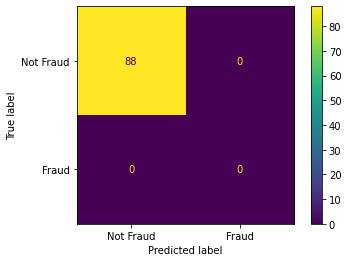

In [161]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Fraud', 'Fraud'])
disp.plot()